### Importing Necessary Libraries

In [13]:
import os
from google.colab import files, drive
import zipfile
import json
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Get The Dataset From Google Drive

In [14]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
dataset_path = "/content/drive/My Drive/Machine Learning Datasets/ml-latest-small"

In [16]:
movies = pd.read_csv(dataset_path + '/movies.csv', index_col = 'movieId')
movies.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


### Retrieving Features from Movie Title and Genre

In [17]:
### The Time at which a movie got released plays a very important role in Recommendation System.
### Maybe more than the Genre of the Movies.
### We use the year bucket as a list, to make it easier for combination with Genre later on.
year_pattern = re.compile(r'(\()(\d\d\d\d)(\))')

def get_year_bucket(x):
    try:
        year_ = int(year_pattern.search(x).group(2))
        if(year_ < 2000):
            return ["1990s"]
        if(year_ < 2005):
            return ["2000 st"]
        if(year_ < 2010):
            return ["2000 end"]
        if(year_ < 2015):
            return ["2010 st"]
        return ["latest"]

    except:
        return []
movies['Year_bucket'] = movies['title'].apply(get_year_bucket)

In [18]:
movies.head()

,title,genres,Year_bucket
movieId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,[1990s]
2,Jumanji (1995),Adventure|Children|Fantasy,[1990s]
3,Grumpier Old Men (1995),Comedy|Romance,[1990s]
4,Waiting to Exhale (1995),Comedy|Drama|Romance,[1990s]
5,Father of the Bride Part II (1995),Comedy,[1990s]


In [19]:
movies.tail()

,title,genres,Year_bucket
movieId,,,
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,[latest]
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,[latest]
193585,Flint (2017),Drama,[latest]
193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,[latest]
193609,Andrew Dice Clay: Dice Rules (1991),Comedy,[1990s]


In [20]:
movies['MovieFeatures'] = (movies.genres.apply(lambda x: x.split('|'))) + movies.Year_bucket
movies.drop(columns = ['genres', 'Year_bucket'], inplace = True)

In [21]:
movies.head()

,title,MovieFeatures
movieId,,
1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fanta..."
2,Jumanji (1995),"[Adventure, Children, Fantasy, 1990s]"
3,Grumpier Old Men (1995),"[Comedy, Romance, 1990s]"
4,Waiting to Exhale (1995),"[Comedy, Drama, Romance, 1990s]"
5,Father of the Bride Part II (1995),"[Comedy, 1990s]"


In [22]:
len(movies)

9742

In [23]:
ICM = pd.DataFrame(index = movies.index)

In [24]:
for idx in movies.index:
    ICM.loc[idx, movies.MovieFeatures.loc[idx]] = 1

In [25]:
ICM.head()

,Adventure,Animation,Children,Comedy,Fantasy,1990s,Romance,Drama,Action,Crime,...,Musical,Documentary,IMAX,Western,Film-Noir,2000 st,2000 end,2010 st,latest,(no genres listed)
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
ICM = (ICM.fillna(0)).astype(np.int8)

In [27]:
ICM.head()

,Adventure,Animation,Children,Comedy,Fantasy,1990s,Romance,Drama,Action,Crime,...,Musical,Documentary,IMAX,Western,Film-Noir,2000 st,2000 end,2010 st,latest,(no genres listed)
movieId,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
ICM.drop(columns = ['(no genres listed)'], inplace = True)

In [29]:
# ICM.to_csv(dataset_path + '/ItemContentMatrix.csv')

### Analysis From Item Content Matrix

In [30]:
movies_by_genre = ICM.sum(axis =0).sort_values(ascending = False)
movies_by_year = movies_by_genre.loc[['1990s', '2000 st', '2000 end', '2010 st', 'latest']]
movies_by_genre = movies_by_genre.drop(index = ['1990s', '2000 st', '2000 end', '2010 st', 'latest'])


Text(0.5, 1.0, 'Movies Count For Different Genre')

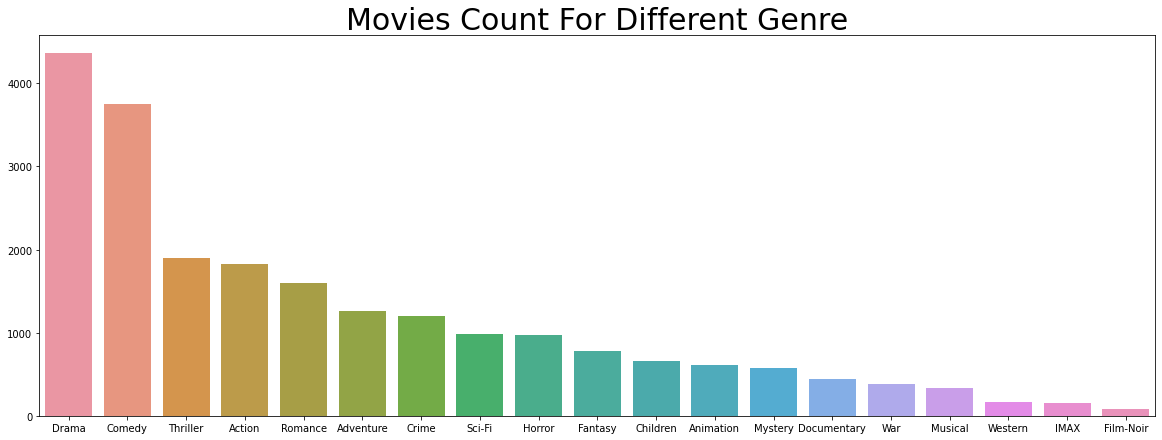

In [31]:
plt.figure(figsize = (20, 7))
sns.barplot(x = movies_by_genre.index, y = movies_by_genre)
plt.title('Movies Count For Different Genre', fontdict = {'fontsize' : 30})

Text(0.5, 1.0, 'Movies Count For Different Release Years')

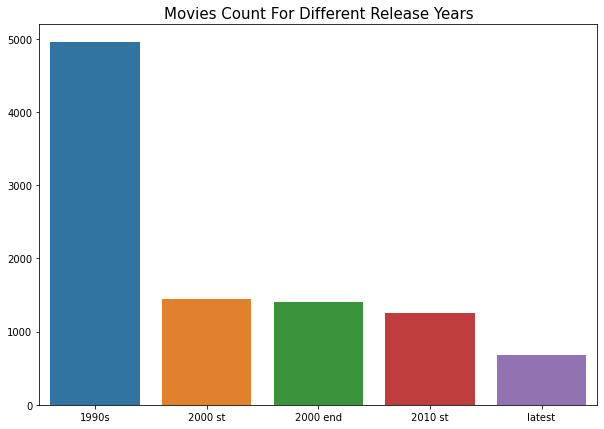

In [32]:
plt.figure(figsize = (10, 7))
sns.barplot(x = movies_by_year.index, y = movies_by_year)
plt.title('Movies Count For Different Release Years', fontdict = {'fontsize' : 15})

# <center> END </center>